# Predictive Modelling

## Exercise 1: Face Recognition (but not as evil this time)

Using the faces dataset in:

```
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
```

If you use the `faces.target` and `faces.target_names` attributes, you can build a facial recognition algorithm.

Use sklearn **gridsearch** (or an equivalent, like random search) to optimize the model for accuracy. Try both a SVM-based classifier and a logistic regression based classifier (with a feature pipeline of your choice) to get the best model. You should have at least 75-80% accuracy.

## Googe colab environment

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 16 01:47:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    51W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


## IMPORTS

In [1]:
# exercise 1
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
#from sklearn.datasets import load_digits
import numpy as np

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score

from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, Normalizer, MinMaxScaler






from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)


## REFERENCE


https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html

In [3]:



#faces.target
faces.target.shape , faces.target_names.shape  # List of 1348 IDs | 8 names and pictures of personalities 

# We will need 8 CLUSTERS

((1348,), (8,))

In [13]:
target_names = faces.target_names
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [5]:
faces.target

array([1, 3, 3, ..., 7, 3, 5])

## IMAGES CARACTERISTICS
fetch_lfw_people Specifications: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

- datanumpy array of shape (13233, 2914)
- imagesnumpy array of shape (13233, 62, 47)

In [9]:
X = faces.data
X.shape

(1348, 2914)

In [10]:
y = faces.target
y.shape

(1348,)

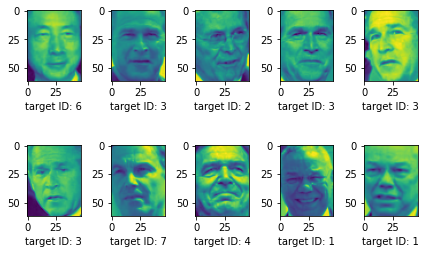

In [7]:

fig1, ax1 = plt.subplots(2,5)
x1 = faces.data[100:110]
for a, row_image in zip(ax1.flat,enumerate(x1.reshape(10,62,47))):
    a.imshow(row_image[1])
    a.set_xlabel("target ID: %d" % faces.target[100+row_image[0]])
plt.tight_layout()

In [8]:
# 'Ariel Sharon',     ID: 0
# 'Colin Powell',     ID: 1
# 'Donald Rumsfeld',  ID: 2
# 'George W Bush',    ID: 3
# 'Gerhard Schroeder',ID: 4
# 'Hugo Chavez',      ID: 5
# 'Junichiro Koizumi',ID: 6
# 'Tony Blair',       ID: 7

# 1 - SET UP of the 1st Pipeline: BASE is logistic regression 

In [12]:

# we can alias the parameters
pipe = Pipeline([
    ('stdslr',StandardScaler()),
    ('pca',PCA()),
    ('logreg', LogisticRegression()),
   
])

#Be careful how you name the params - have to match pipeline objects
param_grid = [
    {
    'pca__n_components': np.arange(0,1,0.2),
    'logreg__C': [1,1e12],
    
}]


grid = GridSearchCV(pipe, param_grid, cv=7)



In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) #Holdout data
X_train.shape, X_test.shape 




((1213, 2914), (135, 2914))

### parameters optimization

In [14]:

#%%timeit

grid.fit(X_train, y_train)
grid.best_params_


{'logreg__C': 1000000000000.0, 'pca__n_components': 0.8}

In [15]:
model = grid.best_estimator_


In [16]:

model

Pipeline(steps=[('stdslr', StandardScaler()), ('pca', PCA(n_components=0.8)),
                ('logreg', LogisticRegression(C=1000000000000.0))])

In [17]:

y_preds = model.fit(X_train,y_train).predict(X_test)

In [18]:
y_preds  # The clusters output labels must be aligned to the personalities ID
            # We must know what each centroid image is

array([3, 7, 2, 4, 3, 4, 4, 7, 3, 3, 2, 2, 3, 3, 3, 1, 6, 7, 4, 5, 3, 1,
       2, 6, 3, 1, 7, 1, 3, 1, 2, 4, 4, 7, 7, 2, 7, 3, 7, 3, 4, 3, 3, 3,
       1, 1, 3, 3, 2, 3, 7, 3, 1, 5, 4, 3, 3, 3, 7, 7, 7, 6, 1, 1, 0, 3,
       1, 4, 5, 3, 3, 1, 6, 5, 1, 2, 4, 2, 2, 2, 1, 7, 3, 2, 1, 0, 1, 2,
       0, 3, 5, 2, 6, 3, 3, 1, 7, 3, 3, 7, 7, 3, 3, 1, 3, 7, 2, 4, 3, 6,
       4, 1, 3, 3, 3, 1, 3, 3, 2, 3, 7, 2, 3, 4, 1, 3, 2, 3, 1, 5, 5, 3,
       1, 3, 4])

In [19]:
y_preds.shape

(135,)

In [20]:
print(classification_report(y_test, y_preds, target_names= target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.33      0.44         6
     Colin Powell       0.87      0.91      0.89        22
  Donald Rumsfeld       0.67      0.75      0.71        16
    George W Bush       0.80      0.84      0.82        44
Gerhard Schroeder       0.57      0.57      0.57        14
      Hugo Chavez       0.43      0.75      0.55         4
Junichiro Koizumi       1.00      0.67      0.80         9
       Tony Blair       0.72      0.65      0.68        20

         accuracy                           0.75       135
        macro avg       0.72      0.68      0.68       135
     weighted avg       0.76      0.75      0.75       135



## ACCURACY: 0.75

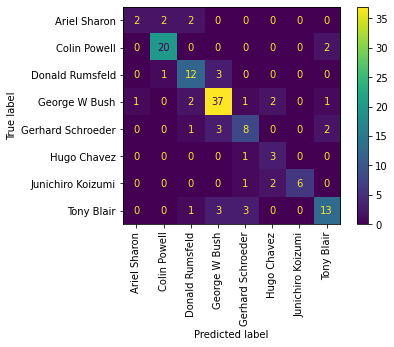

In [21]:
ConfusionMatrixDisplay.from_estimator(
    model, X_test,y_test, display_labels=target_names, xticks_rotation="vertical"
)

## 2 - SET UP of the 2nd Pipeline: BASE is SVM-based classifier

#### NOTE: it tooks over 3 hours in the colab environment and still no result on hyperparameter selection
 so in this example the parameters are fixed 

In [2]:

# we can alias the parameters
pipe2 = Pipeline([
    ('stdslr',StandardScaler()),
    ('pca',PCA()),
    ('svc', SVC()),
])

#Be careful how you name the params - have to match pipeline objects
param_grid2 = [
    {
    'pca__n_components': [150], #5,50,150],
    'svc__kernel': ['rbf'],     #,'linear'],
    'svc__C': [1e6],            #[1,1e3,1e6,1e10]
    
}]


grid2 = GridSearchCV(pipe2, param_grid2, cv=7)



In [3]:
X2 = faces.data
y2 = faces.target

In [4]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0) #Holdout data
X2_train.shape, X2_test.shape 



((943, 2914), (405, 2914))

### parameters optimization

In [5]:

#%%timeit

grid2.fit(X2_train, y2_train)
grid2.best_params_

{'pca__n_components': 150, 'svc__C': 1000000.0, 'svc__kernel': 'rbf'}

In [6]:
model2 = grid2.best_estimator_

In [7]:
model2

Pipeline(steps=[('stdslr', StandardScaler()), ('pca', PCA(n_components=150)),
                ('svc', SVC(C=1000000.0))])

In [9]:
y_preds2 = model2.fit(X2_train,y2_train).predict(X2_test)

In [14]:
print(classification_report(y2_test, y_preds2, target_names= target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.50      0.59        20
     Colin Powell       0.88      0.81      0.85        74
  Donald Rumsfeld       0.71      0.74      0.72        39
    George W Bush       0.79      0.96      0.87       161
Gerhard Schroeder       0.67      0.50      0.57        32
      Hugo Chavez       1.00      0.58      0.73        19
Junichiro Koizumi       0.94      0.75      0.83        20
       Tony Blair       0.75      0.68      0.71        40

         accuracy                           0.80       405
        macro avg       0.81      0.69      0.73       405
     weighted avg       0.80      0.80      0.79       405



## ACCURACY: 0.8

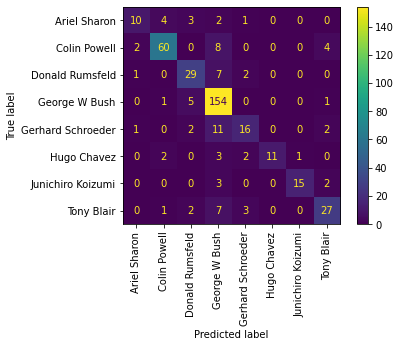

In [15]:
ConfusionMatrixDisplay.from_estimator(
    model2, X2_test,y2_test, display_labels=target_names, xticks_rotation="vertical"
)